In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.2/613.2 kB 7.4 MB/s eta 0:00:00


## Uploading the dataset from Google Drive

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Loading the pretrained model Yolov8 and training it on our custom dataset

In [3]:
from ultralytics import YOLO
dataset = "/content/drive/MyDrive/dataset"

# Loading the pretrained model
model = YOLO("Moldels/yolov8n-cls.pt")

# Training the pretrained model on our custom dataset
model.train(data=dataset, epochs=20, imgsz=64)

100%|██████████| 5.28M/5.28M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=Moldels/yolov8n-cls.pt, data=/content/drive/MyDrive/dataset, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, r

## Ploting the loss and accuracy of the training set and the test set

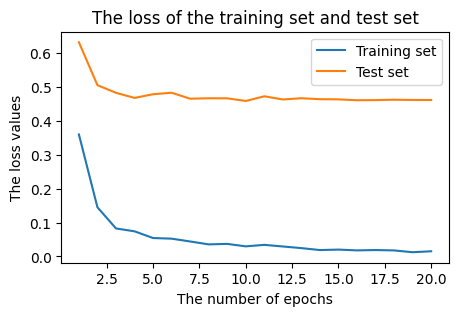

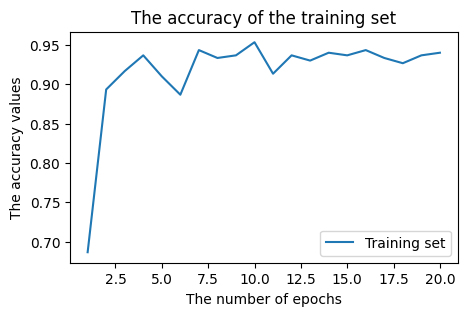

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/runs/classify/train/results.csv")

# Plotting the loss of the training set and the test set
plt.figure(figsize=(5,3))
plt.title("The loss of the training set and test set")
plt.plot(df[df.columns[0]], df[df.columns[1]], label="Training set")
plt.plot(df[df.columns[0]], df[df.columns[4]], label="Test set")
plt.xlabel("The number of epochs")
plt.ylabel("The loss values")
plt.legend()
plt.show()

print()

# Plotting the accuracy of the training set
plt.figure(figsize=(5,3))
plt.title("The accuracy of the training set")
plt.plot(df[df.columns[0]], df[df.columns[2]], label="Training set")
plt.xlabel("The number of epochs")
plt.ylabel("The accuracy values")
plt.legend()
plt.show()

## Making a prediction

In [22]:
# Loading the trained model
model = YOLO("/content/runs/classify/train/weights/last.pt")

# Making a prediction on a new image
path = input("Enter the path of the image: ")
results = model.predict(path)
classes = results[0].names
prediction =  classes[results[0].probs.top1]
conf = float(results[0].probs.top1conf)
print("The prediction class is: ", prediction)
print("Its confidence score is: ", conf)

Enter the path of the image: /content/image.jpg



image 1/1 /content/image.jpg: 64x64 shine 1.00, foggy 0.00, cloudy 0.00, sunrise 0.00, rainy 0.00, 2.4ms
Speed: 0.4ms preprocess, 2.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


The prediction class is:  shine
Its confidence score is:  0.9997639060020447
